In [122]:
%matplotlib inline
%load_ext autoreload
%autoreload

from quanty.model import backtester as q
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
mapper = pd.read_csv('mapper.csv', engine='python', sep=',\s+', index_col=0, squeeze=True)
data = pd.read_pickle('prices_global.pkl')
data = data.iloc[data.index.get_level_values(1).isin(mapper.index)]
data = data.rename(index=mapper, level=1)

In [116]:
assets_member = pd.DataFrame([
    ('BND_US_AGG', 'BND_US_AGG'), 
#     ('BND_US_Tbill', 'BND_US_Tbill'), 
    ('BND_US_Short', 'BND_US_Short'), 
    ('BND_US_Interm', 'BND_US_Interm'), 
    ('BND_US_Long', 'BND_US_Long'), 
    ('BND_US_TIP', 'BND_US_TIP'),
    ('BND_US_IG', 'BND_US_IG'), 
    ('BND_US_HY', 'BND_US_HY'), 
    ('BND_US_MBS', 'BND_US_MBS'), 
    ('BND_US_Muni', 'BND_US_Muni'), 
    ('BND_US_Bankloan', 'BND_US_Bankloan'), 
    ('BND_US_CB', 'BND_US_CB'), 
    ('BND_US_HY_Muni', 'BND_US_HY_Muni'), 
    ('BND_US_Pref', 'BND_US_Pref'), 

    ('BND_GlobalSov_loc', 'BND_GlobalSov_loc'), 
    ('BND_GlobalTip_loc', 'BND_GlobalTip_loc'), 
    ('BND_GlobalSov_loch', 'BND_GlobalSov_loch'), 
    ('BND_DevSov_loc', 'BND_DevSov_loc'), 
    ('BND_DevFloat_usd', 'BND_DevFloat_usd'), 
    ('BND_DevIG_loc', 'BND_DevIG_loc'), 
    ('BND_DevHY_loc', 'BND_DevHY_loc'), 
    ('BND_EmSov_usd', 'BND_EmSov_usd'), 
    ('BND_EmSov_loc', 'BND_EmSov_loc'), 
    ('BND_EmHy_usd', 'BND_EmHy_usd'), 
#     ('BND_ChinaCredit_loc', 'BND_ChinaCredit_loc'), 
#     ('BND_KR_Short_usd', 'BND_KR_Short_usd'), 
#     ('BND_KR_Interm_usd', 'BND_KR_Interm_usd'), 
#     ('BND_KR_Interm_lev_usd', 'BND_KR_Interm_lev_usd'), 
], columns=['ref', 'bet'])

base_params = {
    'start': '2002-12-31', 
    'end': '2018-03-31', 
    'assets_member': assets_member, 
    'mode': 'DualMomentum', #'DualMomentum', 'AbsoluteMomentum', 'RelativeMomentum'
    'n_picks': 5, 
    'w_type': 'ranky2', 
    'iv_period': 20, 
    'cash': 100000000, 
    'trade_delay': 1, 
    'expense': 0.001, 
    'gr_exposure': 0.99, 
    'n_roll_stats': 250, 
    #'sig_w': np.array([1,0,0,0,0,0,1,0,0,1,1,1]), 
    #'sig_w': np.array([1,0,0,0,0,0,1,0,0,0.25*4,0.25*6,0.25*12]),  # 요거 괜찮네...
    #'sig_w': np.ones(12), 
    #'sig_w': 1/np.arange(12,0,-1), 
    'sig_w': np.array([1,0,0,0,0,0,1,0,0,1,2,3]), 
    'data': data, 
    'ref_src': 'reprice', 
    'bet_src': 'reprice',
    'perf_src': 'reprice', 
    'trading_tolerance': 'at_close', #'buyLow_sellHigh', #buyHigh_sellLow
    'self_trend': (20,60), 
    'rf_trend': (60, 250), 
    'overall_market_check': True, 
    'trade_prev_nav_based': True, 
    'positive_sig_for_riskfree': True, 
    'support_cash': True, 
    #'fill_cash': True, 
    'apply_kelly': None, #{'method':'semivariance', 'vol_period':60, 'self_eval':False}, 
    #'market': '코스피',               # 멤버에 존재
    #'riskfree': '국채10년레버리지',   # 멤버에 존재
    #'cash_equiv': '국채3년',          # 멤버에 존재필요X 
    #'beta_to': '코스피',              # 멤버에 존재필요X
    'market': 'BND_US_AGG', 
    'riskfree': 'BND_US_Long', 
    'cash_equiv': 'BND_US_AGG', 
    'beta_to': 'ACWI', 
    'bm': 'BND_US_AGG', 
    'te_target': None, #0.05, 
    'safety_buffer': 0.8, 
}

In [117]:
#%%prun
gfam = q.Backtester(base_params)

100%|█████████████████████████████████████| 3839/3839 [00:08<00:00, 462.58it/s]


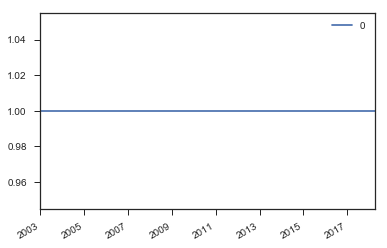

In [118]:
gfam.eta.plot()

In [54]:
gfam.stats.tail()

,beta,cagr,cagr_roll_med,consistency,cum_last,hit,loss_proba,mdd,n_samples,profit_to_loss,sharpe,sharpe_roll_med,std,std_roll_med
BND_EmSov_loc,0.28,3.23,4.55,2.60,1.39,62.30,41.21,-32.01,2581,0.79,0.29,0.40,11.02,10.25
BND_DevHY_loc,0.31,7.81,7.52,-26.47,1.94,56.73,30.38,-24.07,2204,1.25,0.70,0.65,11.16,11.36
BND_US_CB,0.44,6.88,9.53,77.79,2.77,65.75,25.81,-47.67,3829,0.91,0.63,1.03,10.89,9.15
BND_US_HY_Muni,0.01,5.56,7.80,82.94,2.30,72.53,23.20,-30.43,3839,0.73,0.85,1.81,6.52,5.89
DualMomentum,-0.05,9.12,7.52,98.29,3.82,69.78,3.09,-14.26,3839,1.15,1.17,1.16,7.77,6.79


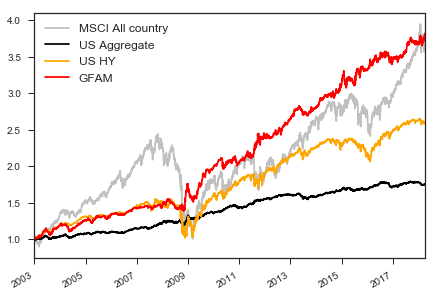

In [7]:
strats = ['ACWI', 'BND_US_AGG', 'BND_US_HY', 'DualMomentum']
names = ['MSCI All country', 'US Aggregate', 'US HY', 'GFAM']
color = ['silver', 'k', 'orange', 'r']

gfam.plot_cum(strats, names=names, color=color, logy=False)

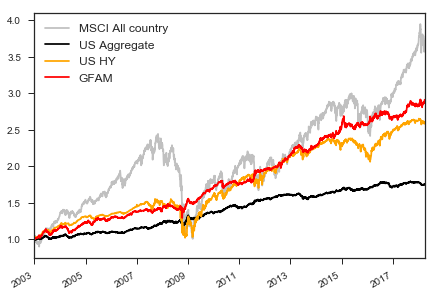

In [37]:
strats = ['ACWI', 'BND_US_AGG', 'BND_US_HY', 'DualMomentum']
names = ['MSCI All country', 'US Aggregate', 'US HY', 'GFAM']
color = ['silver', 'k', 'orange', 'r']

gfam.plot_cum(strats, names=names, color=color, logy=False)

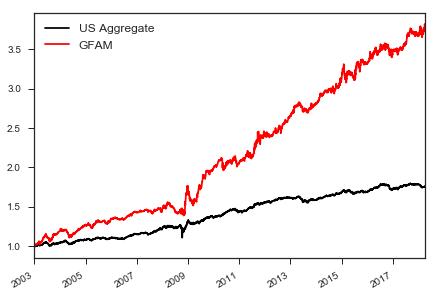

In [119]:
strats = ['BND_US_AGG', 'DualMomentum']
names = ['US Aggregate', 'GFAM']
color = ['k', 'r']

gfam.plot_cum(strats, names=names, color=color, logy=False)

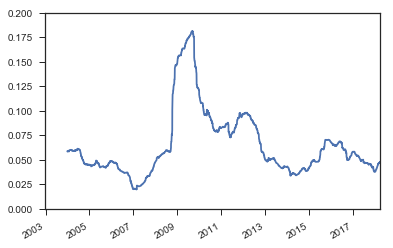

In [120]:
df_te = gfam.cum.pct_change()
((df_te['DualMomentum']-df_te[base_params['bm']]).rolling(250).std()*(250**0.5)).plot(ylim=(0,0.20))

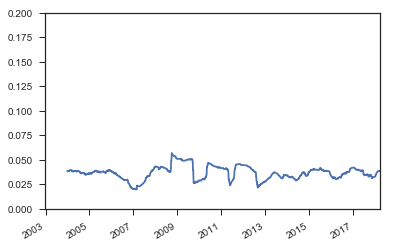

In [115]:
df_te = gfam.cum.pct_change()
((df_te['DualMomentum']-df_te[base_params['bm']]).rolling(250).std()*(250**0.5)).plot(ylim=(0, 0.20))

In [249]:
gfam.weight.loc['2008':'2009']#.sum(axis=1)

bet,BND_US_AGG,BND_US_Short,BND_US_Interm,BND_US_Long,BND_US_TIP,BND_US_IG,BND_US_HY,BND_US_MBS,BND_US_Muni,BND_US_Bankloan,...,BND_GlobalSov_loc,BND_GlobalTip_loc,BND_GlobalSov_loch,BND_DevSov_loc,BND_DevFloat_usd,BND_DevIG_loc,BND_DevHY_loc,BND_EmSov_usd,BND_EmSov_loc,BND_EmHy_usd
2008-01-31,0.000000,0.000000,0.054300,0.047025,0.066504,0.000000,0.738121,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.094050,0.000000,0.0,0.0,0.000000,0.000000,0.000000
2008-02-29,0.000000,0.059285,0.068456,0.000000,0.083842,0.000000,0.616821,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.118570,0.000000,0.0,0.0,0.000000,0.000000,0.000000
2008-03-31,0.000000,0.036127,0.057122,0.046640,0.040391,0.000000,0.738939,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.080782,0.000000,0.0,0.0,0.000000,0.000000,0.000000
2008-04-30,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.875673,0.000000,0.000000,0.059849,...,0.0,0.0,0.0,0.034554,0.000000,0.0,0.0,0.000000,0.000000,0.000000
2008-05-30,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.804932,0.000000,0.000000,0.070056,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.035028,0.000000,0.049537
2008-06-30,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.728506,0.000000,0.000000,0.112456,...,0.0,0.0,0.0,0.000000,0.159037,0.0,0.0,0.000000,0.000000,0.000000
2008-07-31,0.000000,0.040766,0.064456,0.045577,0.052628,0.000000,0.705418,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.091155,0.000000,0.0,0.0,0.000000,0.000000,0.000000
2008-08-29,0.000000,0.000000,0.112414,0.158977,0.079489,0.000000,0.486237,0.071097,0.091786,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
2008-09-30,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
2008-10-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000


In [211]:
gfam_raw = q.Backtester(base_params, te_target=None)
gfam_5 = q.Backtester(base_params, te_target=0.05)
gfam_4 = q.Backtester(base_params, te_target=0.04)
gfam_3 = q.Backtester(base_params, te_target=0.03)
gfam_2 = q.Backtester(base_params, te_target=0.02)
gfam_1 = q.Backtester(base_params, te_target=0.01)

100%|█████████████████████████████████████| 3839/3839 [00:09<00:00, 402.11it/s]


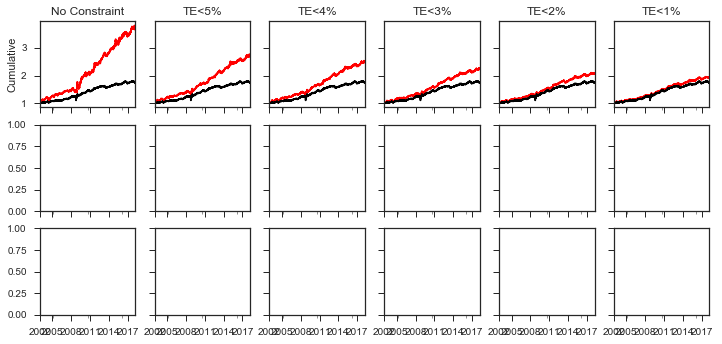

In [323]:
fig, axes = plt.subplots(3, 6, sharey='row', sharex=True, figsize=(6*2,3*2));
#plt.subplots_adjust(hspace=0.5)
clr = ['r','k']
axes[0,0].set_ylabel('Cumulative') #xticks=gfam_raw.cum.index[::1250]
gfam_raw.cum[['DualMomentum','BND_US_AGG']].plot(ax=axes[0,0], legend=False, color=clr, title='No Constraint', xticks=dates_all[ticks])
gfam_5.cum[['DualMomentum','BND_US_AGG']].plot(ax=axes[0,1], legend=False, color=clr, title='TE<5%', xticks=dates_all[ticks])
gfam_4.cum[['DualMomentum','BND_US_AGG']].plot(ax=axes[0,2], legend=False, color=clr, title='TE<4%', xticks=dates_all[ticks])
gfam_3.cum[['DualMomentum','BND_US_AGG']].plot(ax=axes[0,3], legend=False, color=clr, title='TE<3%', xticks=dates_all[ticks])
gfam_2.cum[['DualMomentum','BND_US_AGG']].plot(ax=axes[0,4], legend=False, color=clr, title='TE<2%', xticks=dates_all[ticks])
gfam_1.cum[['DualMomentum','BND_US_AGG']].plot(ax=axes[0,5], legend=False, color=clr, title='TE<1%', xticks=dates_all[ticks])


# axes[1,0].set_ylabel('Tracking error')
# rtns = gfam_raw.cum.pct_change()
# ((rtns['DualMomentum']-rtns['BND_US_AGG']).rolling(250).std()*(250**0.5)).plot(ax=axes[1,0], legend=False, color='k', xticks=ticks_base)

# rtns = gfam_5.cum.pct_change()
# ((rtns['DualMomentum']-rtns['BND_US_AGG']).rolling(250).std()*(250**0.5)).plot(ax=axes[1,1], legend=False, color='k')

# rtns = gfam_4.cum.pct_change()
# ((rtns['DualMomentum']-rtns['BND_US_AGG']).rolling(250).std()*(250**0.5)).plot(ax=axes[1,2], legend=False, color='k')

# rtns = gfam_3.cum.pct_change()
# ((rtns['DualMomentum']-rtns['BND_US_AGG']).rolling(250).std()*(250**0.5)).plot(ax=axes[1,3], legend=False, color='k')

# rtns = gfam_2.cum.pct_change()
# ((rtns['DualMomentum']-rtns['BND_US_AGG']).rolling(250).std()*(250**0.5)).plot(ax=axes[1,4], legend=False, color='k')

# rtns = gfam_1.cum.pct_change()
# ((rtns['DualMomentum']-rtns['BND_US_AGG']).rolling(250).std()*(250**0.5)).plot(ax=axes[1,5], legend=False, color='k')

# axes[2,0].set_ylabel('Tuning weight ($\eta$)')
# gfam_raw.eta.plot.area(ax=axes[2,0], legend=False, color='silver', ylim=(0,1))
# gfam_5.eta.plot.area(ax=axes[2,1], legend=False, color='silver')
# gfam_4.eta.plot.area(ax=axes[2,2], legend=False, color='silver')
# gfam_3.eta.plot.area(ax=axes[2,3], legend=False, color='silver')
# gfam_2.eta.plot.area(ax=axes[2,4], legend=False, color='silver')
# gfam_1.eta.plot.area(ax=axes[2,5], legend=False, color='silver')

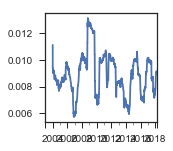

In [213]:
df = ((rtns['DualMomentum']-rtns['BND_US_AGG']).rolling(250).std()*(250**0.5))#.plot(figsize=(2,2))
df.reindex(df_index, method='ffill').plot(figsize=(2,2))

In [319]:
dates_all = pd.date_range(start=base_params['start'], end=base_params['end'])
ticks_base = [pd.Timestamp(str(y)+'-01-01') for y in dates_all.year.unique()[::3]]
ticks = dates_all.get_indexer(ticks_base, method='bfill')

In [321]:
dates_all[ticks]

DatetimeIndex(['2002-12-31', '2005-01-01', '2008-01-01', '2011-01-01',
               '2014-01-01', '2017-01-01'],
              dtype='datetime64[ns]', freq=None)

In [275]:
dates_all

DatetimeIndex(['2002-12-31', '2003-01-01', '2003-01-02', '2003-01-03',
               '2003-01-04', '2003-01-05', '2003-01-06', '2003-01-07',
               '2003-01-08', '2003-01-09',
               ...
               '2018-03-22', '2018-03-23', '2018-03-24', '2018-03-25',
               '2018-03-26', '2018-03-27', '2018-03-28', '2018-03-29',
               '2018-03-30', '2018-03-31'],
              dtype='datetime64[ns]', length=5570, freq='D')

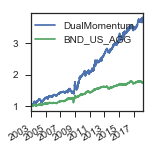

In [299]:
gfam_raw.cum[['DualMomentum','BND_US_AGG']].plot(figsize=(2,2))